In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report



#1-Explore Data

In [362]:
train=pd.read_csv(r'/content/train.csv')
test=pd.read_csv(r'/content/test.csv')

In [363]:
#train.head()
#train.tail(10)
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,344,0,2,"Sedgwick, Mr. Charles Frederick Waddington",male,25.0,0,0,244361,13.0000,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
614,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.0500,NaN,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,NaN,S
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S


In [364]:
train.shape

(891, 12)

In [365]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [366]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [367]:
nu=train.isnull().sum()
nu[nu>0]

,0
Age,177
Cabin,687
Embarked,2


<Axes: >

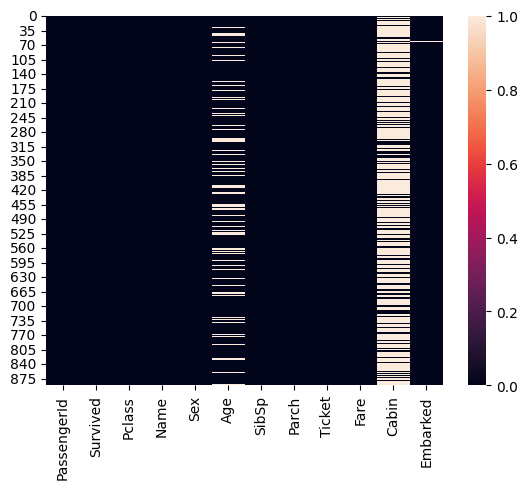

In [368]:
sns.heatmap(train.isnull())

#2-Clean Data

In [369]:
train.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)

In [370]:
train.Age.fillna(train.Age.median(),inplace=True)

/tmp/ipython-input-3279494725.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Age.fillna(train.Age.median(),inplace=True)


In [371]:
train.dropna(inplace=True)

<Axes: >

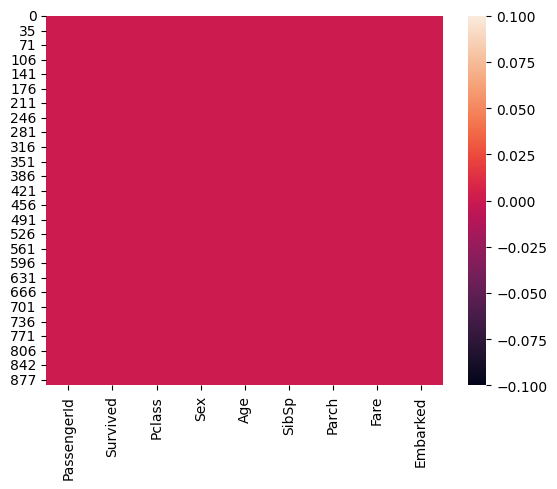

In [372]:
sns.heatmap(train.isnull())

In [373]:
train.shape

(889, 9)

In [374]:
def clean_data(df):
  df.drop(['Cabin','Name','Ticket'],axis=1,inplace=True)
  df.Age.fillna(df.Age.median(),inplace=True)
  df.dropna(inplace=True)
  return df

In [375]:
clean_data(test)

/tmp/ipython-input-4191787452.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(df.Age.median(),inplace=True)


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,27.0,0,0,8.0500,S


(417, 8)


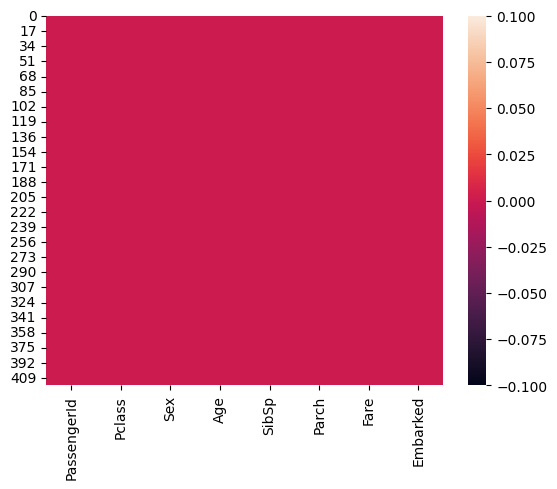

In [376]:
sns.heatmap(test.isnull())
print(test.shape)

#3-Data analysis

In [377]:
correlation=train.corr(numeric_only=True)


<Axes: >

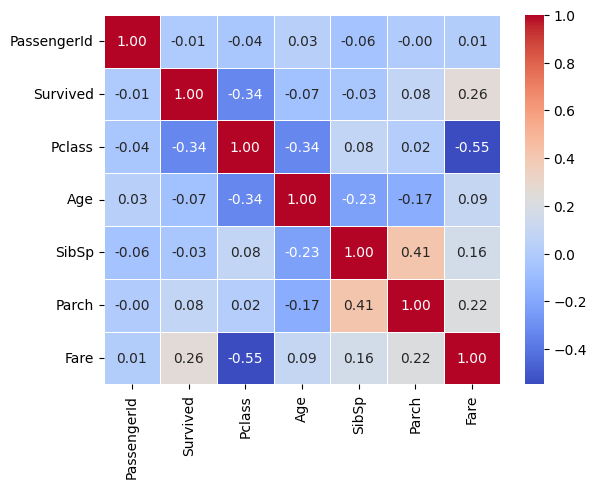

In [378]:
sns.heatmap(correlation,annot=True,fmt='.2f',linewidths=.5,cmap='coolwarm')

In [379]:
train.Survived.value_counts()

,count
Survived,
0,549
1,340


<Axes: ylabel='count'>

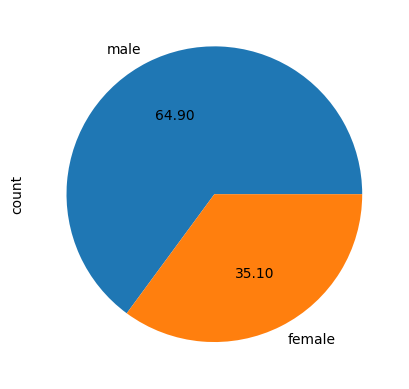

In [380]:
#plt.plot.pie(train.Pclass.value_counts(),autopct='%.2f')
train.Sex.value_counts().plot.pie(autopct='%.2f')

<Axes: xlabel='Sex', ylabel='count'>

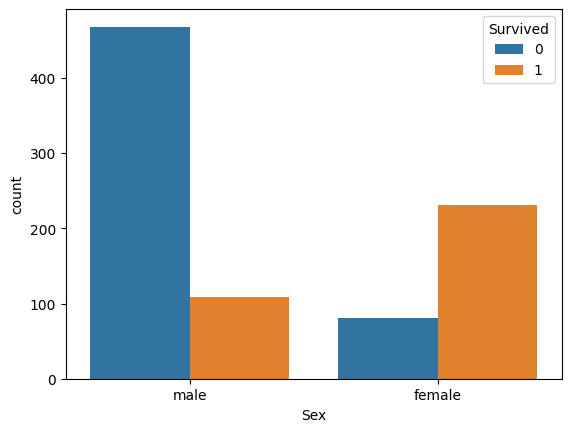

In [381]:
sns.countplot(x='Sex',hue='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

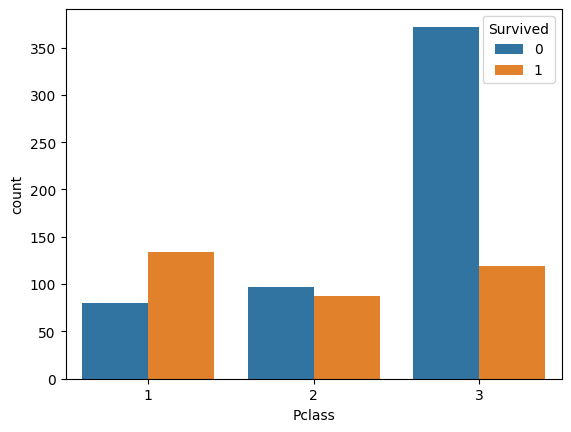

In [382]:
sns.countplot(x='Pclass',hue='Survived',data=train)

<Axes: xlabel='Age', ylabel='Count'>

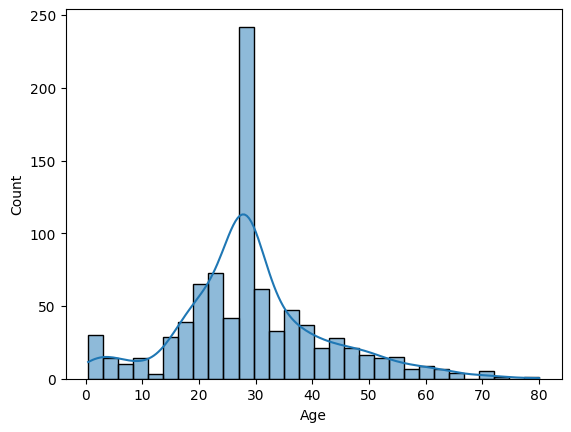

In [383]:
sns.histplot(train['Age'],kde=True)

# Encoding

In [384]:
def encoding(df):
    # Encoding لعمود 'Sex'
    sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')

    # Encoding لعمود 'Embarked'
    embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)

    df = pd.concat([df, sex_dummies, embarked_dummies], axis=1)

    df = df.drop(['Sex', 'Embarked'], axis=1)

    return df


In [385]:
encoding(train)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,True,False,False,False
2,3,1,3,26.0,0,0,7.9250,True,False,False,True
3,4,1,1,35.0,1,0,53.1000,True,False,False,True
4,5,0,3,35.0,0,0,8.0500,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,False,True,False,True
887,888,1,1,19.0,0,0,30.0000,True,False,False,True
888,889,0,3,28.0,1,2,23.4500,True,False,False,True
889,890,1,1,26.0,0,0,30.0000,False,True,False,False


In [386]:
encoding(test)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,True,True,False
1,893,3,47.0,1,0,7.0000,True,False,False,True
2,894,2,62.0,0,0,9.6875,False,True,True,False
3,895,3,27.0,0,0,8.6625,False,True,False,True
4,896,3,22.0,1,1,12.2875,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,False,True,False,True
414,1306,1,39.0,0,0,108.9000,True,False,False,False
415,1307,3,38.5,0,0,7.2500,False,True,False,True
416,1308,3,27.0,0,0,8.0500,False,True,False,True


In [387]:
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0
887,888,1,1,0,19.0,0,0,30.0000,0
888,889,0,3,0,28.0,1,2,23.4500,0
889,890,1,1,1,26.0,0,0,30.0000,1


In [388]:
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,27.0,0,0,8.0500,0
414,1306,1,0,39.0,0,0,108.9000,1
415,1307,3,1,38.5,0,0,7.2500,0
416,1308,3,1,27.0,0,0,8.0500,0


#5-Model

In [389]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [390]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [391]:
Accuracies=[]
def Model(model):
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred)
  print("Acurracy=",accuracy)
  Accuracies.append(accuracy)


In [392]:
Model(LogisticRegression())

Acurracy= 0.8033707865168539


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [393]:
Model(KNeighborsClassifier())

Acurracy= 0.6235955056179775


In [394]:
Model(DecisionTreeClassifier())

Acurracy= 0.7191011235955056


In [395]:
Model(SVC())

Acurracy= 0.6348314606741573


In [396]:
Model(GaussianNB())

Acurracy= 0.7921348314606742


In [397]:
Model(RandomForestClassifier())

Acurracy= 0.7921348314606742


In [398]:
Model(GradientBoostingClassifier())

Acurracy= 0.8089887640449438


In [399]:
Algorithms=['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','SVC','GaussianNB','RandomForestClassifier','GradientBoostingClassifier']

In [400]:
pd.DataFrame({'Algorithms':Algorithms,'Accuracies':Accuracies})

,Algorithms,Accuracies
0,LogisticRegression,0.803371
1,KNeighborsClassifier,0.623596
2,DecisionTreeClassifier,0.719101
3,SVC,0.634831
4,GaussianNB,0.792135
5,RandomForestClassifier,0.792135
6,GradientBoostingClassifier,0.808989


In [401]:
best_model=GradientBoostingClassifier()
best_model.fit(x_train,y_train)


GradientBoostingClassifier()

In [402]:
from typing_extensions import final
y_pred=best_model.predict(test)
final=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':y_pred})
final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [403]:
final.to_csv('submission_jooo.csv',index=False)